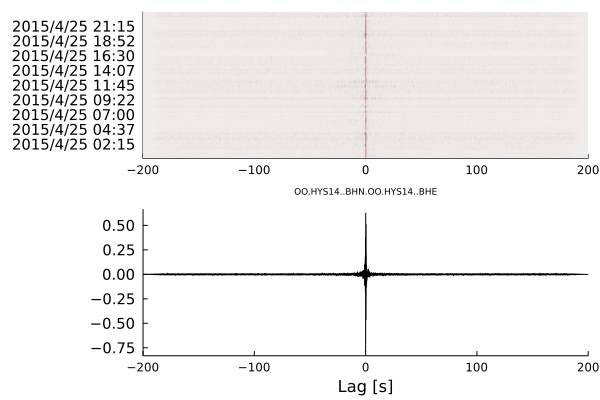

In [15]:
using SeisNoise, SeisIO, Plots
fs = 40. # sampling frequency in Hz
freqmin,freqmax = 0.1,16.0 # min and max frequencies
cc_step, cc_len = 450, 1800 # corrleation step and length in S
maxlag = 200. # maximum lag time in correlation

j=2015
i=115
        if i<10
            a=string("/data/wsd02/maleen_data/OOI-Data/HYS14/",string(j),"/00",string(i),"/HYS14.OO.",string(j),".00",string(i),".BHN")
            b=string("/data/wsd02/maleen_data/OOI-Data/HYS14/",string(j),"/00",string(i),"/HYS14.OO.",string(j),".00",string(i),".BHE")
        elseif i>=10 && i<100
            a=string("/data/wsd02/maleen_data/OOI-Data/HYS14/",string(j),"/0",string(i),"/HYS14.OO.",string(j),".0",string(i),".BHN")
            b=string("/data/wsd02/maleen_data/OOI-Data/HYS14/",string(j),"/0",string(i),"/HYS14.OO.",string(j),".0",string(i),".BHE")
        elseif i>=100 && i<1000
            a=string("/data/wsd02/maleen_data/OOI-Data/HYS14/",string(j),"/",string(i),"/HYS14.OO.",string(j),".",string(i),".BHN")
            b=string("/data/wsd02/maleen_data/OOI-Data/HYS14/",string(j),"/",string(i),"/HYS14.OO.",string(j),".",string(i),".BHE")
        end

        S1=read_data(a)
        S2=read_data(b)

        # Load StationXML and remove instrument response
        resp_file_1 = "/data/wsd02/maleen_data/OOI-Data/StationXML/OO.HYS14..BHN.xml" # specify the path to the StationXML file for station 1
        resp_file_2 = "/data/wsd02/maleen_data/OOI-Data/StationXML/OO.HYS14..BHE.xml" # specify the path to the StationXML file for station 2

        meta1 = SeisIO.read_meta("sxml",resp_file_1)
        meta2 = SeisIO.read_meta("sxml",resp_file_2)
            
        SeisIO.translate_resp!(S1, meta1.resp[1], chans=1)
        SeisIO.translate_resp!(S2, meta1.resp[1], chans=1)
            
        SeisIO.remove_resp!(S1)
        SeisIO.remove_resp!(S2)

        process_raw!(S1,fs)
        process_raw!(S2,fs)

        R = RawData.([S1,S2],cc_len,cc_step)
        detrend!.(R)
        taper!.(R)
        bandpass!.(R,freqmin,freqmax,zerophase=true)
        #onebit!.(R)
        #clip!.(R,1.5)
        #mute!.(R,1.5)
        remove_amp!.(R,max_std=4)
        FFT = rfft.(R)
        whiten!.(FFT,freqmin,freqmax)
        C = correlate(FFT[1],FFT[2],maxlag)
        clean_up!(C,freqmin,freqmax)
        abs_max!(C)
        plot(C)


In [5]:
R

2-element Vector{RawData}:
 RawData with 139 windows
      NAME: "OO.HYS14..BHZ"                    
        ID: "2015-04-25"                       
       LOC: 0.0 N, 0.0 E, 0.0 m
        FS: 40.0
      GAIN: 1.0
   FREQMIN: 0.1
   FREQMAX: 16.0
    CC_LEN: 1800.0
   CC_STEP: 450.0
  WHITENED: false                              
 TIME_NORM: ""                                 
      RESP: a0 1.0, f0 1.0, 1z, 1p
      MISC: 0 entries                          
     NOTES: 8 entries                          
         T: 2015-04-25T00:00:00                …
         X: 72000×139 Matrix{Float32}          

 RawData with 139 windows
      NAME: "OO.HYSB1..BHZ"                    
        ID: "2015-04-25"                       
       LOC: 0.0 N, 0.0 E, 0.0 m
        FS: 40.0
      GAIN: 1.0
   FREQMIN: 0.1
   FREQMAX: 16.0
    CC_LEN: 1800.0
   CC_STEP: 450.0
  WHITENED: false                              
 TIME_NORM: ""                                 
      RESP: a0 1.0, f0 1.0, 1z, 1p
   